# Stock Prices Prediction Using Keras Long Term Short Memory

In [1]:
! pip3 install matplotlib
! pip3 install pandas
! pip3 install numpy
! pip3 install seaborn



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\Praveen_Prabha_Ravin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\Praveen_Prabha_Ravin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\Praveen_Prabha_Ravin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\Praveen_Prabha_Ravin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
! pip install scikit-learn
import sklearn

     ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.3 MB 2.6 MB/s eta 0:00:04
     - -------------------------------------- 0.4/9.3 MB 5.6 MB/s eta 0:00:02
     ---- ----------------------------------- 1.1/9.3 MB 8.9 MB/s eta 0:00:01
     ------- -------------------------------- 1.8/9.3 MB 10.7 MB/s eta 0:00:01
     ------------- -------------------------- 3.1/9.3 MB 14.0 MB/s eta 0:00:01
     ------------------- -------------------- 4.6/9.3 MB 17.3 MB/s eta 0:00:01
     -------------------------- ------------- 6.1/9.3 MB 19.5 MB/s eta 0:00:01
     ------------------------------ --------- 7.1/9.3 MB 19.8 MB/s eta 0:00:01
     ------------------------------------- -- 8.6/9.3 MB 22.0 MB/s eta 0:00:01
     ---------------------------------------  9.1/9.3 MB 20.8 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.3 MB 20.4 MB/s eta 0:00:01
     ---------------------------------------- 9.3/9.3 MB 18.5 M


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\Praveen_Prabha_Ravin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import matplotlib
print(matplotlib.__version__)

3.8.0


In [6]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
# Importing the training set
dataset_train = pd.read_csv('data/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [10]:
dataset_train.head(-5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2025,2010-08-03,118.30,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.30,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.50,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.50,121.70,112.50,117.50,116.60,2359134,2791.03


<Axes: >

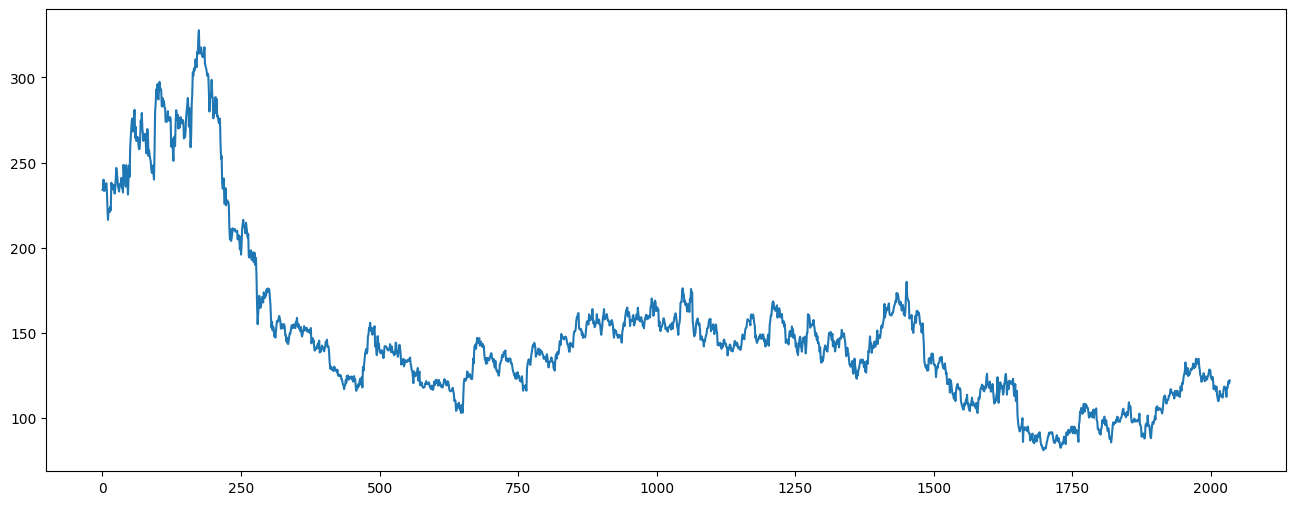

In [11]:
dataset_train['Open'].plot(figsize=(16,6))

In [7]:
dataset_train.iloc[:, 1:2].values

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [10]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

ModuleNotFoundError: No module named 'sklearn'

In [45]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [46]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [47]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [48]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [49]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [50]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [51]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [53]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)



Epoch 1/50
1975/1975 [==============================] - 18s 9ms/step - loss: 0.0072
Epoch 2/50
1975/1975 [==============================] - 11s 6ms/step - loss: 0.0028
Epoch 3/50
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0025
Epoch 4/50
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0029
Epoch 5/50
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0023:
Epoch 6/50
1975/1975 [==============================] - 11s 6ms/step - loss: 0.0020
Epoch 7/50
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0021
Epoch 8/50
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0017
Epoch 9/50
1975/1975 [==============================] - 11s 6ms/step - loss: 0.0019
Epoch 10/50
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0014
Epoch 11/50
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0017
Epoch 12/50
1975/1975 [==============================] - 12s 6ms/step - l

In [54]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [55]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

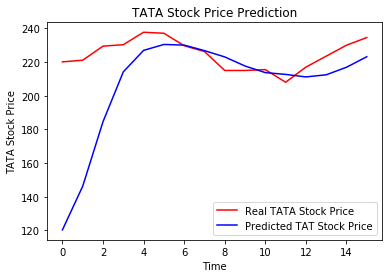

In [56]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()